### Decision Tree Visualization

Please use colab to visualize your Decision Tree
pydotplus and graphviz are hard to install if you are not familiar with them

In [0]:
## importing modules

In [6]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Importing Dataset

Dataset of Hiphop rappers' fashion

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
from google.colab import files
uploaded = files.upload()

Saving final.xlsx to final.xlsx


In [0]:
import pandas as pd

df = pd.read_excel(r'/content/final.xlsx')

In [13]:
df

,Names,Class,Vivid,Achromatic,Cap,Bucket,Sports,Leather,Suit,"T-Shirts,Crewneck/Longsleeve",Hoodies,Tanktops,Chain,Sunglass,Baggy,Sports.1,Jean,Sneakers,Sports (Brands),Boots/Heels,Piercings
0,LL Cool J,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,0
1,Mos Def,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0
2,Big Pun,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0
3,Public enemy,0,0,1,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0
4,Raekwon,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Meek Mill,4,0,1,0,0,1,0,1,1,1,0,1,0,0,0,1,0,1,1,0
96,Quavo,4,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,0,1
97,A$AP Rocky,4,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1
98,Smokepurpp,4,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,1


In [0]:
## change features_cols as yours
## Since Location column is my prediction target it is not included in feature column
feature_cols = ["Vivid","Achromatic","Cap","Bucket","Sports","Leather","Suit","T-Shirts,Crewneck/Longsleeve","Hoodies","Tanktops","Chain","Sunglass","Baggy","Sports","Jean","Sneakers","Sports (Brands)","Boots/Heels","Piercings"]
y = df.Class
X = df[feature_cols]

In [0]:
## We are going to split data. one for training one for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # Separate dataset to training and test sets

In [16]:
print(df.dropna())

           Names  Class  Vivid  ...  Sports (Brands)  Boots/Heels  Piercings
0      LL Cool J      0      1  ...                1            1          0
1        Mos Def      0      0  ...                0            1          0
2        Big Pun      0      1  ...                1            1          0
3   Public enemy      0      0  ...                1            1          0
4        Raekwon      0      0  ...                1            1          0
..           ...    ...    ...  ...              ...          ...        ...
95     Meek Mill      4      0  ...                1            1          0
96         Quavo      4      1  ...                1            0          1
97    A$AP Rocky      4      0  ...                1            0          1
98    Smokepurpp      4      1  ...                1            0          1
99      Lil Pump      4      1  ...                1            0          1

[100 rows x 21 columns]


In [0]:
clf = DecisionTreeClassifier(criterion="entropy") #Default criterion is gini index, If you want to use gini index just delete criterion

clf = clf.fit(X_train,y_train) #Training

y_pred = clf.predict(X_test) #Make a prediction

In [31]:
X_test

,Vivid,Achromatic,Cap,Bucket,Sports,Leather,Suit,"T-Shirts,Crewneck/Longsleeve",Hoodies,Tanktops,Chain,Sunglass,Baggy,Sports,Jean,Sneakers,Sports (Brands),Boots/Heels,Piercings
80,1,1,0,0,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0
84,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0
33,0,1,1,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0
81,1,1,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,0,1
93,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,0
17,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0
36,0,0,1,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,1
82,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,1,1
69,0,0,1,0,1,0,0,1,1,0,0,0,0,1,1,1,1,0,1
65,0,0,1,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1


In [28]:
y_pred

array([4, 1, 1, 4, 2, 1, 0, 3, 4, 4, 3, 0, 0, 0, 2, 3, 1, 0, 3, 0, 0, 3,
       4, 4, 0, 1, 3, 1, 1, 0])

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #Check Accuracy with test set

Accuracy: 0.5666666666666667


### Graph Visualizing

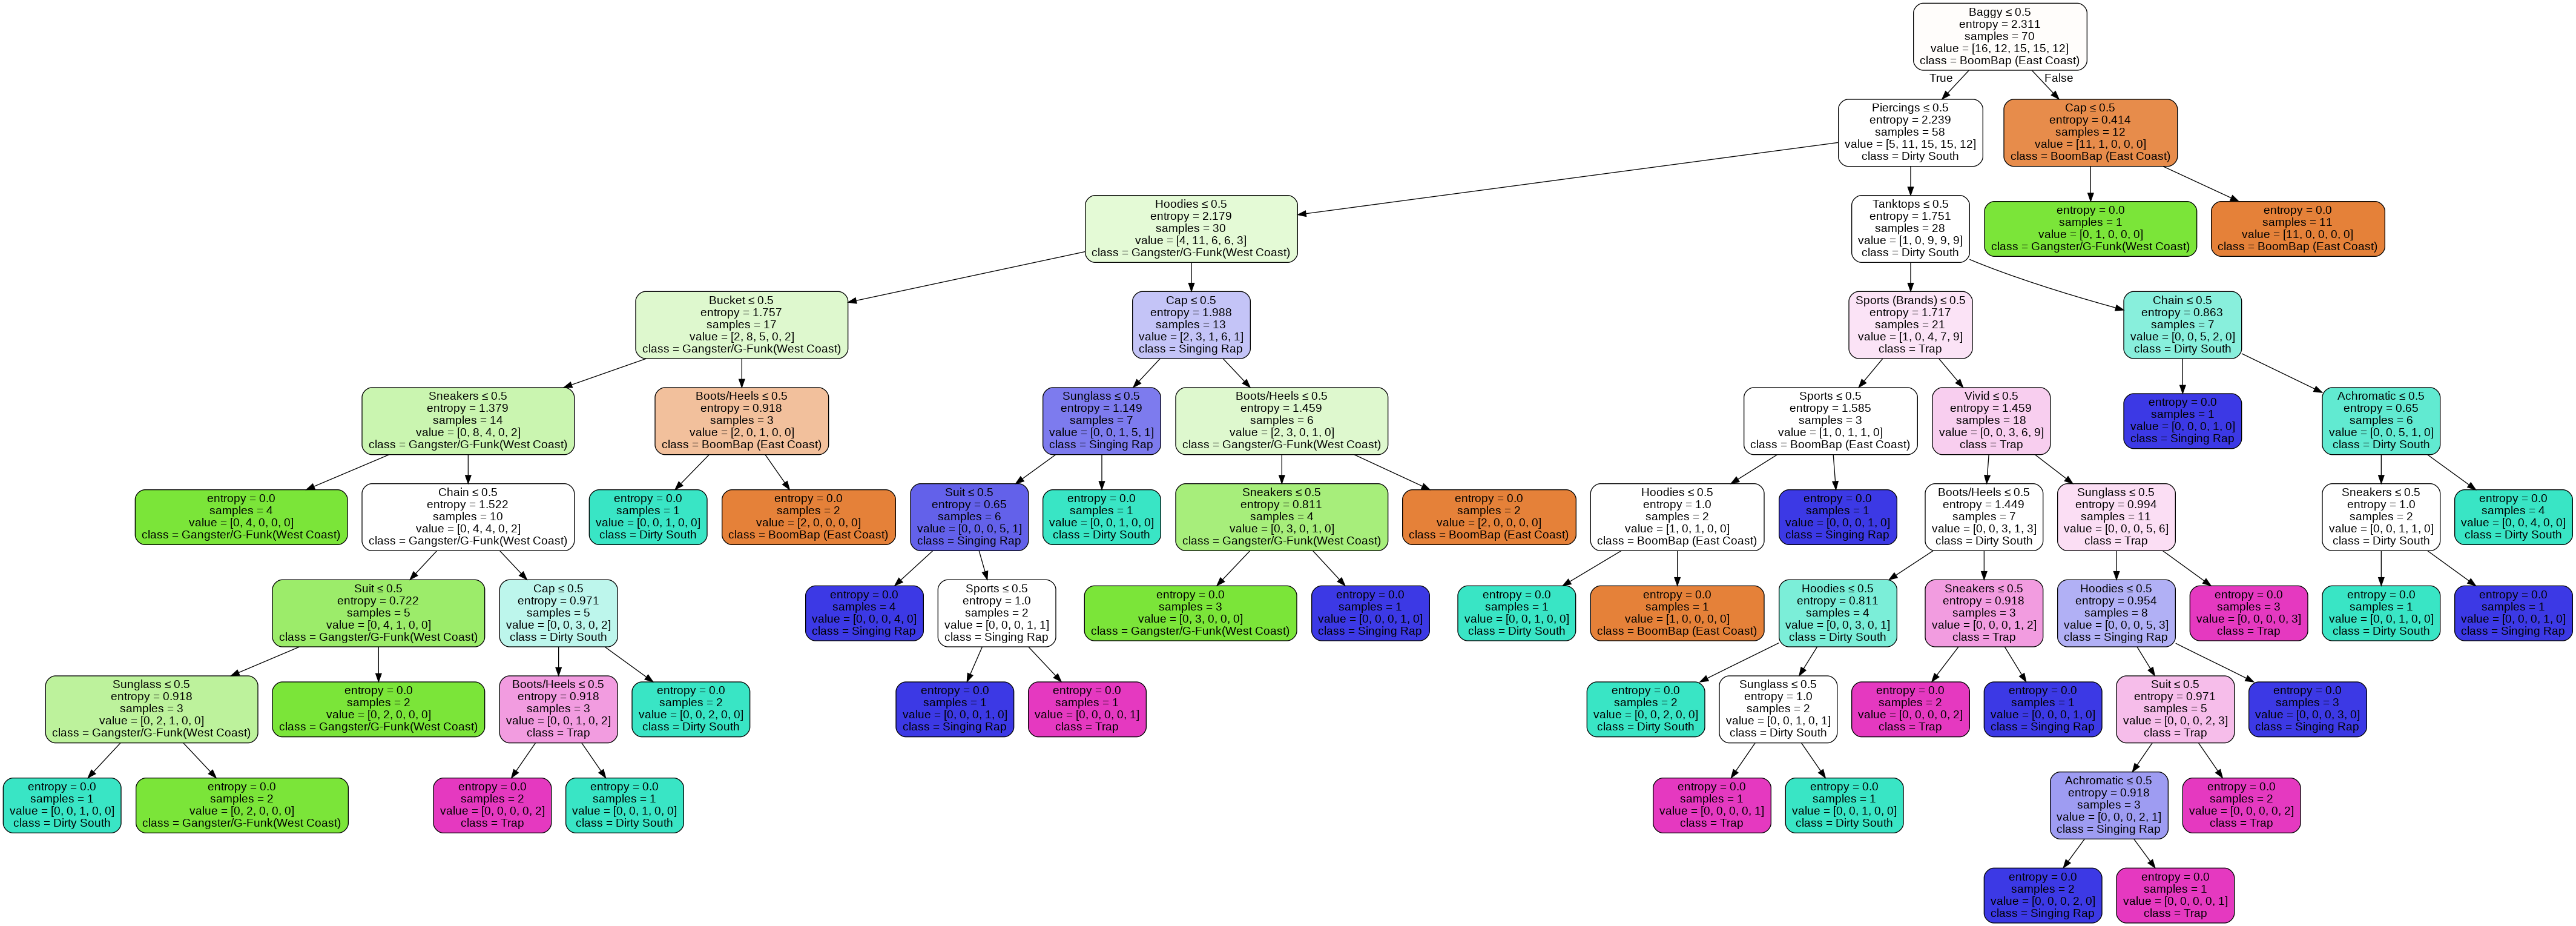

In [40]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['BoomBap (East Coast)','Gangster/G-Funk(West Coast)','Dirty South','Singing Rap','Trap'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hiphopfashion.png')
Image(graph.create_png())